In [2]:
##Q1
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
paragraph = "1 Engaging in sports is crucial for students and children, significantly impacting their overall development and well-being.2 The physical health benefits include maintaining a healthy weight, enhancing cardiovascular health, and developing motor skills.3 Furthermore, sports contribute to mental and emotional strength by reducing stress, boosting self-esteem, and fostering teamwork abilities.4 Additionally, participation in sports promotes social skills, enhances academic performance, and builds lifelong competencies such as discipline and resilience.5 Overall, sports are vital for cultivating well-rounded individuals."
#1
paragraph_lower = re.sub(r'[^\w\s]', '', paragraph.lower())
print(paragraph_lower)
#2
token_word = word_tokenize(paragraph)
print(token_word)
token_sent = sent_tokenize(paragraph)
print(token_sent)
#3
words_split = re.split(r'\W+', paragraph)
print(words_split)
#4
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in token_word if word not in stop_words]
print(filtered_words)
#5
word_freq = {}
for word in filtered_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1
print(word_freq)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


1 engaging in sports is crucial for students and children significantly impacting their overall development and wellbeing2 the physical health benefits include maintaining a healthy weight enhancing cardiovascular health and developing motor skills3 furthermore sports contribute to mental and emotional strength by reducing stress boosting selfesteem and fostering teamwork abilities4 additionally participation in sports promotes social skills enhances academic performance and builds lifelong competencies such as discipline and resilience5 overall sports are vital for cultivating wellrounded individuals
['1', 'Engaging', 'in', 'sports', 'is', 'crucial', 'for', 'students', 'and', 'children', ',', 'significantly', 'impacting', 'their', 'overall', 'development', 'and', 'well-being.2', 'The', 'physical', 'health', 'benefits', 'include', 'maintaining', 'a', 'healthy', 'weight', ',', 'enhancing', 'cardiovascular', 'health', ',', 'and', 'developing', 'motor', 'skills.3', 'Furthermore', ',', 'sp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
##Q2
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
ps = PorterStemmer()
ls = LancasterStemmer()
#1
word_alphabet = re.findall(r'\b\w\b', paragraph)
print(word_alphabet)
#2
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in token_word if word not in stop_words]
print(filtered_words)
#3
lemmatizer = WordNetLemmatizer()
ps_stemmed = [ps.stem(word) for word in filtered_words]
print(ps_stemmed)
#4
ls_stemmed = [ls.stem(word) for word in filtered_words]
print(ls_stemmed)
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]
print(lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['1', '2', 'a', '3', '4', '5']
['1', 'Engaging', 'sports', 'crucial', 'students', 'children', ',', 'significantly', 'impacting', 'overall', 'development', 'well-being.2', 'The', 'physical', 'health', 'benefits', 'include', 'maintaining', 'healthy', 'weight', ',', 'enhancing', 'cardiovascular', 'health', ',', 'developing', 'motor', 'skills.3', 'Furthermore', ',', 'sports', 'contribute', 'mental', 'emotional', 'strength', 'reducing', 'stress', ',', 'boosting', 'self-esteem', ',', 'fostering', 'teamwork', 'abilities.4', 'Additionally', ',', 'participation', 'sports', 'promotes', 'social', 'skills', ',', 'enhances', 'academic', 'performance', ',', 'builds', 'lifelong', 'competencies', 'discipline', 'resilience.5', 'Overall', ',', 'sports', 'vital', 'cultivating', 'well-rounded', 'individuals', '.']
['1', 'engag', 'sport', 'crucial', 'student', 'children', ',', 'significantli', 'impact', 'overal', 'develop', 'well-being.2', 'the', 'physic', 'health', 'benefit', 'includ', 'maintain', 'health

In [11]:
##Q3
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
texts = [
    "Great product, works as expected!",
    "Worst purchase ever, broke after one use.",
    "Fantastic service and very fast delivery."
]
#1
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(texts)
print(vectorizer.get_feature_names_out())
print(bow.toarray())
#2
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(texts)
print(vectorizer.get_feature_names_out())
print(tfidf.toarray())
#3
top_words = {}
for i, text in enumerate(texts):
    words = text.split()
    for word in words:
        if word in top_words:
            top_words[word].append(i)
        else:
            top_words[word] = [i]
print(top_words)

['after' 'and' 'as' 'broke' 'delivery' 'ever' 'expected' 'fantastic'
 'fast' 'great' 'one' 'product' 'purchase' 'service' 'use' 'very' 'works'
 'worst']
[[0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0]
 [1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0]]
['after' 'and' 'as' 'broke' 'delivery' 'ever' 'expected' 'fantastic'
 'fast' 'great' 'one' 'product' 'purchase' 'service' 'use' 'very' 'works'
 'worst']
[[0.         0.         0.4472136  0.         0.         0.
  0.4472136  0.         0.         0.4472136  0.         0.4472136
  0.         0.         0.         0.         0.4472136  0.        ]
 [0.37796447 0.         0.         0.37796447 0.         0.37796447
  0.         0.         0.         0.         0.37796447 0.
  0.37796447 0.         0.37796447 0.         0.         0.37796447]
 [0.         0.40824829 0.         0.         0.40824829 0.
  0.         0.40824829 0.40824829 0.         0.         0.
  0.         0.40824829 0.         0.40824829 0.         0.    

In [16]:
from math import cos
##Q4
from sklearn.metrics.pairwise import cosine_similarity
text1 = "Artificial Intelligence (AI) allows machines to mimic human intelligence by interpreting data and making choices. AI is revolutionizing sectors with use in healthcare, finance, and manufacturing. Machine learning, which is a part of AI, enables systems to learn from data and get better over time. The technology is essential for pushing automation and fixing complicated issues."
text2 = "Blockchain is a distributed digital record that keeps track of transactions in a secure and open manner. It is perhaps best recognized for enabling cryptocurrencies such as Bitcoin, but it is also used in supply chain management, voting systems, and digital contracts. The main characteristic of Blockchain is its capacity to safely store data on multiple computers with no single point of failure."
#1
preprocess_text1 = re.sub(r'[^\w\s]', '', text1.lower())
print(preprocess_text1)
preprocess_text2 = re.sub(r'[^\w\s]', '', text2.lower())
print(preprocess_text2)
token1 = word_tokenize(preprocess_text1)
print(token1)
token2 = word_tokenize(preprocess_text2)
print(token2)
#3
#a
jaccard = len(set(token1).intersection(set(token2))) / len(set(token1).union(set(token2)))
print("Jaccard Similarity:", jaccard)
#b
cosine_sim = cosine_similarity(vectorizer.transform([preprocess_text1]), vectorizer.transform([preprocess_text2]))
print("Cosine Similarity:", cosine_sim[0][0])

artificial intelligence ai allows machines to mimic human intelligence by interpreting data and making choices ai is revolutionizing sectors with use in healthcare finance and manufacturing machine learning which is a part of ai enables systems to learn from data and get better over time the technology is essential for pushing automation and fixing complicated issues
blockchain is a distributed digital record that keeps track of transactions in a secure and open manner it is perhaps best recognized for enabling cryptocurrencies such as bitcoin but it is also used in supply chain management voting systems and digital contracts the main characteristic of blockchain is its capacity to safely store data on multiple computers with no single point of failure
['artificial', 'intelligence', 'ai', 'allows', 'machines', 'to', 'mimic', 'human', 'intelligence', 'by', 'interpreting', 'data', 'and', 'making', 'choices', 'ai', 'is', 'revolutionizing', 'sectors', 'with', 'use', 'in', 'healthcare', 'fi

Polarity: 0.6875
Subjectivity: 0.75
Sentiment: Positive


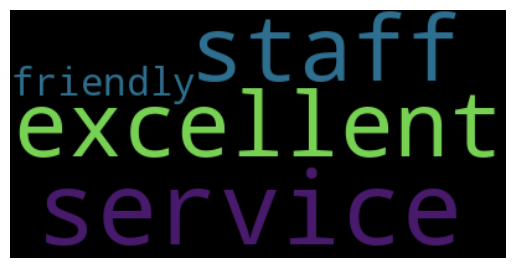

In [19]:
##Q5
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#1
review = "The service was excellent and the staff was friendly."
blob = TextBlob(review)
polarity = blob.sentiment.polarity
print("Polarity:", polarity)
subjectivity = blob.sentiment.subjectivity
print("Subjectivity:", subjectivity)
#2
if polarity > 0.1:
  sentiment = "Positive"
  print("Sentiment:", sentiment)
elif polarity < -0.1:
  sentiment = "Negative"
  print("Sentiment:", sentiment)
else:
  sentiment = "Neutral"
  print("Sentiment:", sentiment)
#3
wordcloud = WordCloud().generate(review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
##Q6
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np
text = "Artificial Intelligence is about making machines that can think and learn like people. These machines are made to solve problems, make decisions, and do tasks like recognising voices, reading data, or driving cars. AI is now part of daily life. Voice helpers like Siri maps for directions, and online shopping suggestions all use AI. It also helps in hospitals by finding diseases early and in farming by checking crops and weather. AI works faster and more accurately than people in many cases, saving time and effort. But some people worry that it could take jobs or be used wrongly. There are also privacy concerns when personal data is used. Even with these concerns, AI can make life better if used the right way. It can make work easier, keep us safer, and solve hard problems. By using it wisely and fairly, AI can help us build a better future for everyone."
#1
tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

# Convert to sequences
tokens = tokenizer.texts_to_sequences([paragraph])[0]
input_sequences = []
for i in range(1, len(tokens)):
    input_sequences.append(tokens[:i+1])
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')
#2
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.eye(total_words)[y]

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(LSTM(64))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=1)
#3
def generate_text(seed_text, next_words=15):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text
print(generate_text("Artificial Intelligence"))
print(generate_text("AI"))


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.0177 - loss: 4.2482
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1167 - loss: 4.2453
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0812 - loss: 4.2423
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0969 - loss: 4.2398
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1008 - loss: 4.2356
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0617 - loss: 4.2340
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0851 - loss: 4.2269
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0773 - loss: 4.2174
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0890 - loss: 4.1963
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0851 - loss: 4.1743
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0656 - loss: 4.1594
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0773 - loss: 4.1227
E